## Italian DCP Covid-19 Data Analysis (*Regional-level*)
The COVID-19 pandemic has been a global health crisis that has affected millions of people across the world. Italy is one of the countries that was hit hard by the pandemic, and it has been at the forefront of efforts to track and control the spread of the virus.

Italy has been praised for its data-sharing setup ([*Naqvi A., 2021*](https://doi.org/10.1038/s41597-021-00950-7)), which is one of the best among European countries. The COVID-19 data used in this Jupyter Notebook is sourced from the [official GitHub page]((https://github.com/pcm-dpc/COVID-19)) of the Italian Civil Protection Department. The Civil Protection Department is a government agency in Italy responsible for handling emergency situations and protecting the population from natural disasters, accidents, and other hazards.

During the COVID-19 pandemic, the Civil Protection Department has played a crucial role in coordinating the national response and providing up-to-date information on the spread of the virus. As part of their efforts, they have made comprehensive data available on their official GitHub page, including data on COVID-19 cases and deaths, healthcare and testing metrics (and finally vaccinations data) at regional level. The regions defined in data perfectly match NUTS 2021 definitions, which makes it easier for researchers to analyze the data.

As a Master's student, I am conducting an exploratory analysis of COVID-19 data both at a province and region level in Italy. This analysis will serve as the foundation stone of my Master's Thesis, which aims to investigate the impact of the pandemic on businesses' bankruptcies.
Through this analysis, I will explore the available COVID-19 data on the official GitHub page and filter it to focus on the Emilia-Romagna provinces. I will manipulate the data and produce visualizations that will aid in further analysis to understand the impact of the virus on the region's economy.

It is important to note that this analysis is exploratory in nature and aims to provide a starting point for further investigation. 

***
#### Table of Contents

- [Data Reading](#read)
- [Data Cleaning](#clean)
- [Data Manipulation](#manipulation)
- [Data Selection](#selection)
- [Visualization](#plots)

In [1]:
%run setup.ipynb

### Data Reading <a class='anchor' id='read'></a>
The code reads in a dataset of COVID-19 data at regional level in Italy, and stores it in a variable called `regioni`. The dataset contains some columns that are not needed, such as notes and NUTS codes, so those columns are dropped using the `drop()` function. The `data` column, which contains the date in a string format, is converted to a date data-type using the `pd.to_datetime()` function. This allows the date to be manipulated and analyzed more easily using Python. A new column called `DateIndex` is created as a duplicate so that it can be used as an index for the dataset.
<br>

The dataset is then reorganized using the `set_index` and `sort_index` functions. A hierarchical index with region name, and date was set for easy filtering and grouping of the data at different levels of granularity. For example, you can quickly filter data for a specific region or a specific date range.

In [2]:
# Constructs the full file path for the CSV file
path = os.path.join(DATA_PATH, "dpc-covid19-ita-regioni.csv")
    
try:
    with open(path, "r") as file:
        regioni = pd.read_csv(file)
        regioni.drop(columns=['note','codice_nuts_1','codice_nuts_2','note_test','note_casi'], inplace=True)
        regioni.data = regioni.data.apply(lambda L: L.partition('T')[0])
        regioni['data']=pd.to_datetime(regioni['data'])
        regioni['DateIndex'] = regioni['data']
        regioni.set_index(['denominazione_regione','DateIndex'], inplace=True)
        regioni.sort_index(level=[0,1], inplace=True)
except FileNotFoundError:
    print("The specified CSV file was not found.")


display(regioni.tail())
regioni.info()

data stato  codice_regione        lat  \
denominazione_regione DateIndex                                                
Veneto                2023-02-12 2023-02-12   ITA               5  45.434905   
                      2023-02-13 2023-02-13   ITA               5  45.434905   
                      2023-02-14 2023-02-14   ITA               5  45.434905   
                      2023-02-15 2023-02-15   ITA               5  45.434905   
                      2023-02-16 2023-02-16   ITA               5  45.434905   

                                       long  ricoverati_con_sintomi  \
denominazione_regione DateIndex                                       
Veneto                2023-02-12  12.338452                     250   
                      2023-02-13  12.338452                     249   
                      2023-02-14  12.338452                     236   
                      2023-02-15  12.338452                     251   
                      2023-02-16  12.338452                     260   

                                  terapia_intensiva  totale_ospedalizzati  \
denominazione_regione DateIndex                                             
Veneto                2023-02-12                 18                   268   
                      2023-02-13                 19                   268   
                      2023-02-14                 14                   250   
                      2023-02-15                 14                   265   
                      2023-02-16                 14                   274   

                                  isolamento_domiciliare  totale_positivi  \
denominazione_regione DateIndex                                             
Veneto                2023-02-12                   15805            16073   
                      2023-02-13                   15333            15601   
                      2023-02-14                   15536            15786   
                      2023-02-15                   15800            16065   
                      2023-02-16                   16078            16352   

                                  ...  casi_da_sospetto_diagnostico  \
denominazione_regione DateIndex   ...                                 
Veneto                2023-02-12  ...                           NaN   
                      2023-02-13  ...                           NaN   
                      2023-02-14  ...                           NaN   
                      2023-02-15  ...                           NaN   
                      2023-02-16  ...                           NaN   

                                  casi_da_screening  totale_casi   tamponi  \
denominazione_regione DateIndex                                              
Veneto                2023-02-12                NaN      2683304  36823912   
                      2023-02-13                NaN      2683392  36826070   
                      2023-02-14                NaN      2684275  36852032   
                      2023-02-15                NaN      2684912  36870904   
                      2023-02-16                NaN      2685547  36889484   

                                  casi_testati  ingressi_terapia_intensiva  \
denominazione_regione DateIndex                                              
Veneto                2023-02-12     5281137.0                         1.0   
                      2023-02-13     5281304.0                         2.0   
                      2023-02-14     5282379.0                         1.0   
                      2023-02-15     5283172.0                         3.0   
                      2023-02-16     5284166.0                         2.0   

                                  totale_positivi_test_molecolare  \
denominazione_regione DateIndex                                     
Veneto                2023-02-12                        1055860.0   
                      2023-02-13                        1055833.0   
                      2023-02-14

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 22869 entries, ('Abruzzo', Timestamp('2020-02-24 00:00:00')) to ('Veneto', Timestamp('2023-02-16 00:00:00'))
Data columns (total 24 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   data                                    22869 non-null  datetime64[ns]
 1   stato                                   22869 non-null  object        
 2   codice_regione                          22869 non-null  int64         
 3   lat                                     22869 non-null  float64       
 4   long                                    22869 non-null  float64       
 5   ricoverati_con_sintomi                  22869 non-null  int64         
 6   terapia_intensiva                       22869 non-null  int64         
 7   totale_ospedalizzati                    22869 non-null  int64         
 8   isolamento_domiciliare                  228

<br>

### Data Cleaning <a class='anchor' id='clean'></a>

Missing data in this dataset is due to the decisions and willingness of the institutional bodies responsible for collecting and publishing data. Unfortunately, there is nothing we can do about it, and therefore, we will have to keep those missings as they are. However, we should be aware of this and take it into consideration in future analyses. 

- Data on ***"intensive care unit admissions "*** is made public as of *3 December 2020*.
- Data on **positive PCR and rapid antigenic tests** (*with related totals*) is made public as of *15 January 2021*.
- Data on **tested cases** is published as of *19 April 2020*.
- The information on **screened and suspected diagnostic cases** has been disaggregated and made public as of *June 25, 2020*.

⚠️ It is well known that the data in the DCP-Ministry of Health flow do not refer to the day on which they are notified, nor completely to the previous day: recalculations and notes of past notifications are frequent<sup>[1](https://github.com/pcm-dpc/COVID-19/blob/master/note/dpc-covid19-ita-note.csv)</sup>.

⚠️ On *28 October 2022*, the Ministry of Health [announced](https://www.salute.gov.it/portale/news/p3_2_4_1_1.jsp?lingua=italiano&menu=salastampa&p=comunicatistampa&id=5908%C3%B9) that the release of the italian Covid-19 bulletin **would continue on a weekly basis, every Friday.** 
Also, since *30 October 2022*, raw data available from our source suffered the same fate.


In [3]:
# Mention variables that were not available at the beginning of the pandemic
regioni.isnull().sum(0)

data                                          0
stato                                         0
codice_regione                                0
lat                                           0
long                                          0
ricoverati_con_sintomi                        0
terapia_intensiva                             0
totale_ospedalizzati                          0
isolamento_domiciliare                        0
totale_positivi                               0
variazione_totale_positivi                    0
nuovi_positivi                                0
dimessi_guariti                               0
deceduti                                      0
casi_da_sospetto_diagnostico              19467
casi_da_screening                         19467
totale_casi                                   0
tamponi                                       0
casi_testati                               1155
ingressi_terapia_intensiva                 5943
totale_positivi_test_molecolare         

## Data Manipulation <a class='anchor' id='manipulation'></a>

In the data manipulation step, several new features were created in the `regioni` dataset. These features were created to provide additional information that will be useful for the analysis.

The first group of features created is the "`<metric>_100k`" column, where "`<metric>`" represents one of the absolute value variables available in the dataset. The `std_columns` function calculates the `<metric>` per 100,000 people for each region in Italy. This is important because it enables comparison of the `<metric>` between regions, regardless of their population size.
Populations for the years 2020 to 2022 were retrieved from the official database of the Italian National Institute of Statistics ([ISTAT](http://dati.istat.it/Index.aspx?DataSetCode=DCIS_POPRES1#)) and averaged over the same period for each available area of the italian territory.

The second new feature is the `days_from_lock` column, which calculates the number of days between each data point and the date of the first lockdown in Italy, which occurred on *March 9th, 2020*. This is particularly important for the survival models in my thesis, as **it provides a measure of the time that each business in a specific region has been potenitally exposed to some kind of restriction.**

In [4]:
pops = pd.read_csv(f'{DATA_PATH}/istat_pop_media.csv', index_col=0)
display(pops.head()) 
pop_regions = pops[pops.index.isin(regioni.index.get_level_values(0).unique())]
pop_regions.head()

mean_population
Italia           59302611.0
Nord-ovest       15906568.0
Piemonte          4280837.0
Torino            2219507.0
Vercelli           167352.0

mean_population
Piemonte             4280837.0
Valle d'Aosta         124161.0
Liguria              1517516.0
Lombardia            9984053.0
P.A. Bolzano          533391.0

In [5]:
def std_columns(pop_df, df, col_names):
    # Loop through each column name in the list of column names
    for col_name in col_names:
        # Create a new column name by adding '_100k' to the original column name
        new_col_name = col_name + '_100k'
        # Create a new column with the new column name and fill it with NaN values
        df[new_col_name] = np.NAN

        # Loop through each region and its corresponding population in the population dataframe
        for index, row in pop_df.iterrows():
            region = index
            pop = row[0]
            
            # Calculate the new values for the new column for the current region
            # by dividing the values in the original column by the population and multiplying by 100,000
            # Round the result to 2 decimal places

            new_col = np.round((df.loc[region, col_name] / pop) * 100000, 0)

            # Update the new column with the new values for the current region
            df.loc[region, new_col_name] = new_col.values
            #df.loc[region, new_col_name] = np.round((df.loc[region, col_name] / pop) * 100000, 2) 

    # Return the updated DataFrame
    return df


The daily number of new COVID cases, deaths, and tests can be affected by various factors, such as *testing capacity, administrative reporting delays, and variations in the spread of the virus.* This can result in **significant volatility in the daily numbers, which may not accurately reflect the true trend of the outbreak**. By calculating a rolling average over a period of 7 days or more, these fluctuations can be mitigated, and the underlying trend of the outbreak can be better visualized.

The `rolling()` function in Pandas can be used to compute rolling statistics over a specified window size. In this case, we want to compute the rolling average of the `"nuovi_positivi"` column for each region over a window size of 7 days. 
This code groups the DataFrame by `"denominazione_regione"` and then applies the `rolling()` function to the `"nuovi_positivi"` column for each group with a window size of 7 days. The resulting object is a Pandas Series with hierarchical index containing the rolling average values for each day and region.

The hierarchical index of the Pandas series returned by the first line of code would consist of three levels. The first level would correspond to the `'denominazione_regione'` column, which is the region name, since the original DataFrame was grouped by this column. The second level would correspond to the `'denominazione_regione'` column of the original DataFrame, and the third level would correspond to the DateTime index of the original DataFrame.

To extract the rolling average values from the Series and add them as a new column to the original DataFrame, we can use the `reset_index()` function to **remove the groupby index from the Series**.

In [6]:
import warnings

# Use the filterwarnings function to ignore the warning messages
warnings.filterwarnings('ignore')


# Apply the std_columns function to standardize columns with population count and create new ones
regioni = std_columns(pop_regions, regioni, ['totale_positivi','nuovi_positivi','deceduti','totale_casi'])

# Add a new column to represent the number of days from lockdown (2020-03-09)
regioni.insert(1, "days_from_lock", regioni['data'] - pd.to_datetime('2020-03-09'))

# Add a new column 'nuovi_positivi_ma' representing the rolling 7-day average of 'nuovi_positivi' for each region
# A rolling average is computed by taking the mean of the last 7 values of 'nuovi_positivi' for each region
regioni.insert(14, "nuovi_positivi_ma", regioni.groupby('denominazione_regione')['nuovi_positivi'].rolling(7).mean().reset_index(level=0, drop=True))

# Add a new column 'nuovi_positivi_100k_ma' representing the rolling 7-day average of 'nuovi_positivi_100k' for each region
# A rolling average is computed by taking the mean of the last 7 values of 'nuovi_positivi_100k' for each region
regioni.insert(len(regioni.columns)-2, "nuovi_positivi_100k_ma", regioni.groupby('denominazione_regione')['nuovi_positivi_100k'].rolling(7).mean().reset_index(level=0, drop=True))

# Reset the warning filter to its default state
warnings.filterwarnings('default')
regioni.info()


<class 'pandas.core.frame.DataFrame'>
MultiIndex: 22869 entries, ('Abruzzo', Timestamp('2020-02-24 00:00:00')) to ('Veneto', Timestamp('2023-02-16 00:00:00'))
Data columns (total 31 columns):
 #   Column                                  Non-Null Count  Dtype          
---  ------                                  --------------  -----          
 0   data                                    22869 non-null  datetime64[ns] 
 1   days_from_lock                          22869 non-null  timedelta64[ns]
 2   stato                                   22869 non-null  object         
 3   codice_regione                          22869 non-null  int64          
 4   lat                                     22869 non-null  float64        
 5   long                                    22869 non-null  float64        
 6   ricoverati_con_sintomi                  22869 non-null  int64          
 7   terapia_intensiva                       22869 non-null  int64          
 8   totale_ospedalizzati             

This code block shows an example of how the computed 7-day rolling average of daily new positives is fine. A plot is computed comparing the raw data to the smoothed data for a single region (in this case, Emilia-Romagna).

The code uses the query method to select only the rows in the reg_selection dataframe where the denominazione_regione column is equal to "Emilia-Romagna". It then plots the `nuovi_positivi_100k` column (daily new positives per 100,000 people) as a grey dotted line labeled *"Emilia-Romagna RAW"*, and the `nuovi_positivi_100k_ma` column (7-day rolling average of daily new positives per 100,000 people) as a purple line labeled *"Emilia-Romagna 7D-MA"* on the same plot using plot method.

Text(0.04, -0.15, 'Source: Italian Civil Protection')

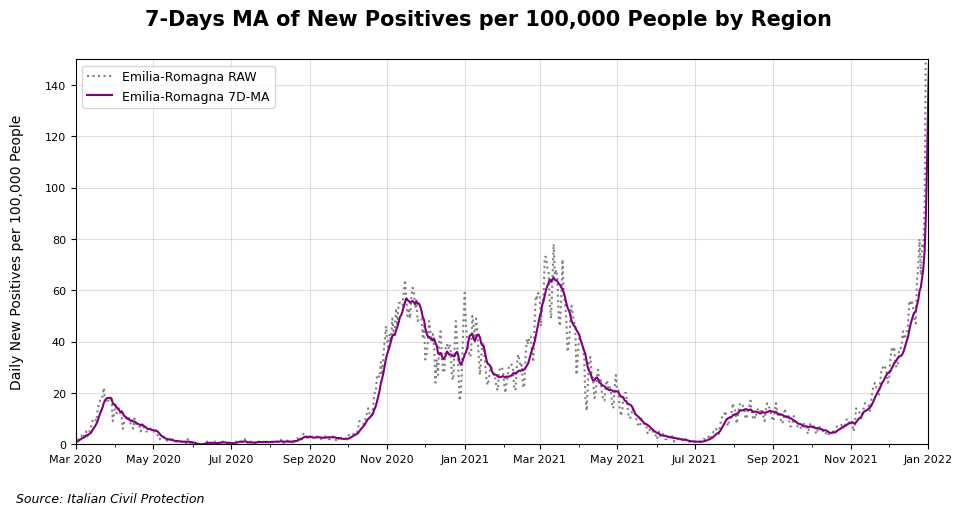

In [7]:
# Plot each province's data on the same plot
fig, ax = plt.subplots(figsize=(11, 5))

# Select only the data for the Emilia-Romagna region
ER_regione = regioni.loc['Emilia-Romagna']

# Plot the raw data and the 7-day moving average for Emilia-Romagna
ER_regione.plot(x='data', y='nuovi_positivi_100k', label='Emilia-Romagna RAW', ax=ax, color='grey', ls=':' )
ER_regione.plot(x='data', y='nuovi_positivi_100k_ma', label='Emilia-Romagna 7D-MA', ax=ax, color='purple')

# Format the x-axis with a date formatter and tick locator
date_fmt = DateFormatter('%b %Y')
locator = AutoDateLocator()
locator.intervald[3] = 3  # show every 3 months
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(date_fmt)

# Format the x- and y-axis tick labels
ax.tick_params(axis='x', rotation=0, labelsize=8)
ax.tick_params(axis='y', rotation=0, labelsize=8)
ax.xaxis.set_tick_params(which='minor', labelsize=0)

# Set the x- and y-axis limits
ax.set_xlim(('Mar 2020', 'Jan 2022'))
ax.set_ylim((0, 150))

# Add x- and y-axis labels and a suptitle
plt.xlabel('', labelpad=15)
plt.ylabel('Daily New Positives per 100,000 People', labelpad=15, fontsize=10)
plt.suptitle('7-Days MA of New Positives per 100,000 People by Region', fontsize=15, fontweight='bold')

# Add a grid and legend to the plot
plt.grid(alpha=0.4)
plt.legend(markerscale=100, prop={'size': 9}, loc="upper left")

# Add the data source as a footnote
ax.text(0.04, -0.15, "Source: Italian Civil Protection", ha="center", fontsize=9, transform=ax.transAxes, fontstyle="italic")


Next, new CSV files are created to store the filtered data using the `to_csv()` function. Files are saved in the `results` folder of the working directory, with the filenames:
-  `regioni_clean.csv` containing the full dataset after the cleaning and data manipulation steps; 
-  `ER_regione.csv` consisting in the Emilia-Romagna region data filtered from the previous set; 
-  `NORD_regioni.csv` consisting in all the North and Centre-North regions of Italy as filtered from the cleaned dataset.
  
  This will allow the final result to be easily accessed and analyzed in the future. Overall, these steps ensure that data is specific to the region of interest and ready for further analysis and querying.

In [8]:
file_path = f'{RESULTS_PATH}/regioni_clean.csv'
with open(file_path, "w") as f:
    regioni.to_csv(f)

In [9]:
reg_selection = [i for i in range(12)]
NORD_regioni = regioni.query('codice_regione.isin(@reg_selection)')
file_path = f'{RESULTS_PATH}/NORD_regioni.csv'
with open(file_path, "w") as f:
    NORD_regioni.to_csv(f)

In [10]:
file_path = f'{RESULTS_PATH}/ER_regione.csv'
with open(file_path, "w") as f:
    ER_regione.to_csv(f)

## Plots <a class='anchor' id='plots'></a>

In [11]:
# Create a 'groupby' object to be used in the plots
grouped = NORD_regioni.groupby(level='denominazione_regione')

# Create a copy of the turbo color map
custom_cmap = mpl.colormaps.get_cmap('turbo').copy()

# Modify the last color to be a lighter purple
purple = (0.5, 0.0, 0.5, 1.0) # (R, G, B, A)
light_purple = tuple(0.7 * x + 0.3 for x in purple[:3]) + (1.0,)
custom_cmap.colors[-1] = light_purple

# Create a color map for each province
colors = custom_cmap(np.linspace(0, 1, len(grouped)))


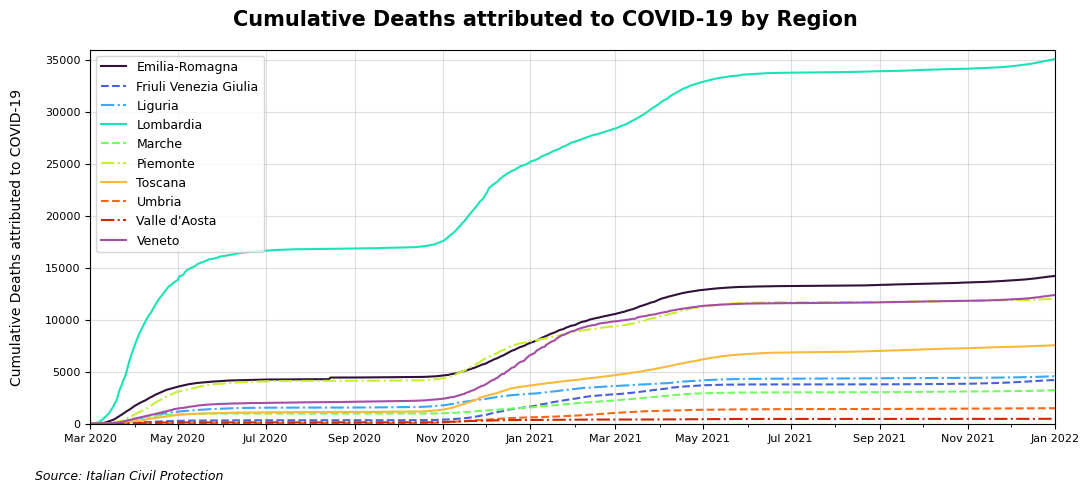

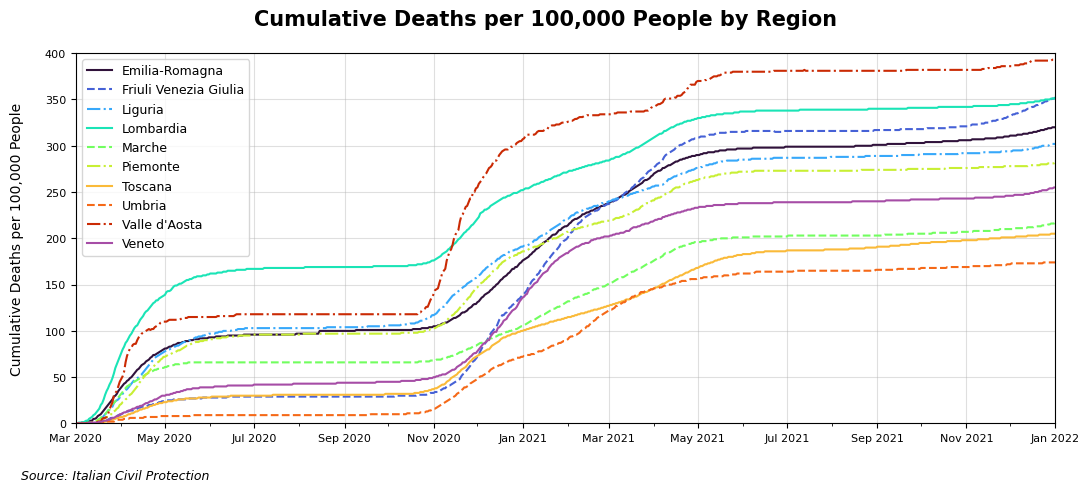

In [12]:
fig, ax = plt.subplots(figsize=(11, 5))

for i, (name, group) in enumerate(grouped):
    # Use the remainder operator to cycle through a list of 3 line styles
    ls = ['-', '--', '-.'][i % 3]
    group.plot(x='data', y='deceduti', label=name, ax=ax, color=colors[i], ls=ls)

# Add plot labels and legend
date_fmt = DateFormatter('%b %Y')
locator = AutoDateLocator()
locator.intervald[3] = 2  # show every 3 months
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(date_fmt)
ax.tick_params(axis='x', rotation=0, labelsize=8)
ax.tick_params(axis='y', rotation=0, labelsize=8)
ax.xaxis.set_tick_params(which='minor', labelsize=0)
ax.set_xlim(('Mar 2020', 'Jan 2022'))
ax.set_ylim((0, 36000))

plt.xlabel('', labelpad=15)
plt.ylabel('Cumulative Deaths attributed to COVID-19', labelpad=15, fontsize=10)
plt.suptitle('Cumulative Deaths attributed to COVID-19 by Region', fontsize=15, fontweight='bold')
plt.grid(alpha=0.4)
plt.legend(markerscale=100, prop={'size': 9})

# Add the data source as a footnote
ax.text(0.04, -0.15, "Source: Italian Civil Protection", ha="center", fontsize=9, transform=ax.transAxes, fontstyle="italic")

save_fig('deaths_reg')


###############################################################################

# Plot each province's data on the same plot
fig, ax = plt.subplots(figsize=(11, 5))
for i, (name, group) in enumerate(grouped):
    # Use a different line style for odd and even indices
    ls = ['-', '--', '-.'][i % 3]
    group.plot(x='data', y='deceduti_100k', label=name, ax=ax, color=colors[i], ls=ls)

# Add plot labels and legend
date_fmt = DateFormatter('%b %Y')
locator = AutoDateLocator()
locator.intervald[3] = 2  # show every 3 months
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(date_fmt)
ax.tick_params(axis='x', rotation=0, labelsize=8)
ax.tick_params(axis='y', rotation=0, labelsize=8)
ax.xaxis.set_tick_params(which='minor', labelsize=0)
ax.set_xlim(('Mar 2020', 'Jan 2022'))
ax.set_ylim((0, 400))

plt.xlabel('', labelpad=15)
plt.ylabel('Cumulative Deaths per 100,000 People', labelpad=15, fontsize=10)
plt.suptitle('Cumulative Deaths per 100,000 People by Region', fontsize=15, fontweight='bold')
plt.grid(alpha=0.4)
plt.legend(markerscale=100, prop={'size': 9})

# Add the data source as a footnote
ax.text(0.04, -0.15, "Source: Italian Civil Protection", ha="center", fontsize=9, transform=ax.transAxes, fontstyle="italic")

save_fig('deaths_100k_reg')

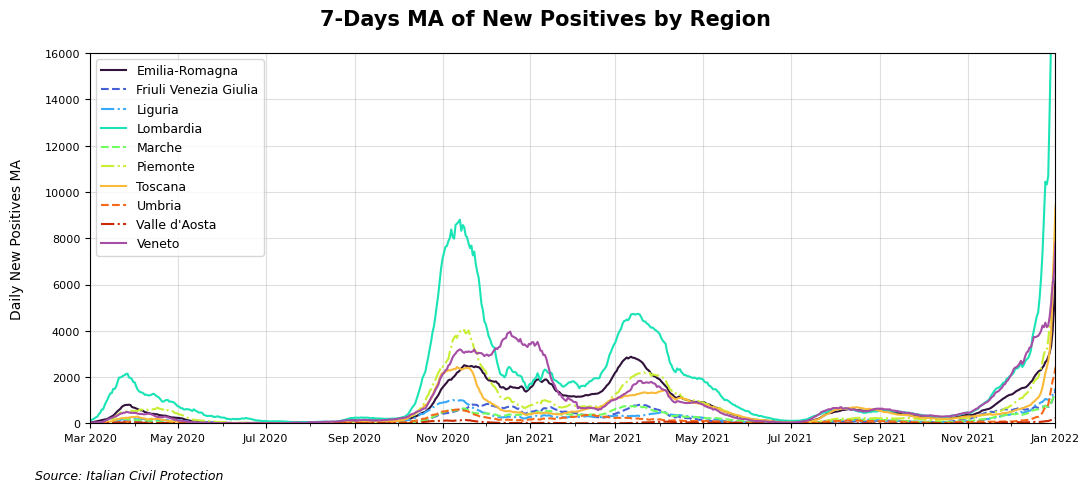

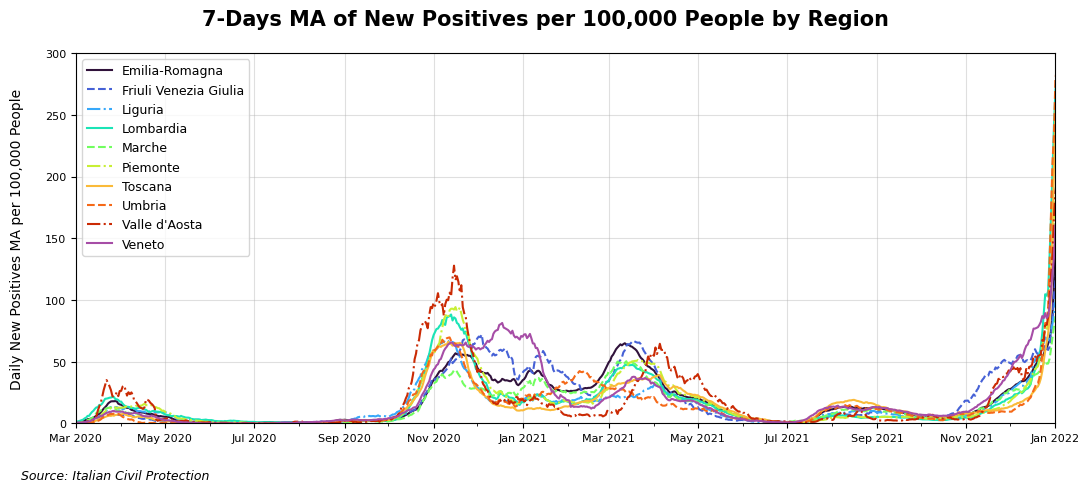

In [13]:
fig, ax = plt.subplots(figsize=(11, 5))
for i, (name, group) in enumerate(grouped):
    # Use a different line style for odd and even indices
    ls = ['-', '--', '-.'][i % 3]
    group.plot(x='data', y='nuovi_positivi_ma', label=name, ax=ax, color=colors[i], ls=ls)

# Add plot labels and legend
date_fmt = DateFormatter('%b %Y')
locator = AutoDateLocator()
locator.intervald[3] = 2  # show every 3 months
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(date_fmt)
ax.tick_params(axis='x', rotation=0, labelsize=8)
ax.tick_params(axis='y', rotation=0, labelsize=8)
ax.xaxis.set_tick_params(which='minor', labelsize=0)
ax.set_xlim(('Mar 2020', 'Jan 2022'))
ax.set_ylim((0, 16000))

plt.xlabel('', labelpad=15)
plt.ylabel('Daily New Positives MA', labelpad=15, fontsize=10)
plt.suptitle('7-Days MA of New Positives by Region', fontsize=15, fontweight='bold')
plt.grid(alpha=0.4)
plt.legend(markerscale=100, prop={'size': 9}, loc="upper left")

# Add the data source as a footnote
ax.text(0.04, -0.15, "Source: Italian Civil Protection", ha="center", fontsize=9, transform=ax.transAxes, fontstyle="italic")

save_fig('new_positives_reg')


###############################################################################

# Plot each province's data on the same plot
fig, ax = plt.subplots(figsize=(11, 5))
for i, (name, group) in enumerate(grouped):
    # Use a different line style for odd and even indices
    ls = ['-', '--', '-.'][i % 3]
    group.plot(x='data', y='nuovi_positivi_100k_ma', label=name, ax=ax, color=colors[i], ls=ls)

# Add plot labels and legend
date_fmt = DateFormatter('%b %Y')
locator = AutoDateLocator()
locator.intervald[3] = 2  # show every 3 months
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(date_fmt)
ax.tick_params(axis='x', rotation=0, labelsize=8)
ax.tick_params(axis='y', rotation=0, labelsize=8)
ax.xaxis.set_tick_params(which='minor', labelsize=0)
ax.set_xlim(('Mar 2020', 'Jan 2022'))
ax.set_ylim((0, 300))

plt.xlabel('', labelpad=15)
plt.ylabel('Daily New Positives MA per 100,000 People', labelpad=15, fontsize=10)
plt.suptitle('7-Days MA of New Positives per 100,000 People by Region', fontsize=15, fontweight='bold')
plt.grid(alpha=0.4)
plt.legend(markerscale=100, prop={'size': 9}, loc="upper left")

# Add the data source as a footnote
ax.text(0.04, -0.15, "Source: Italian Civil Protection", ha="center", fontsize=9, transform=ax.transAxes, fontstyle="italic")

save_fig('new_positives_100k_reg')

#### Map Chart
First, we need to import the required libraries, which are GeoPandas and Matplotlib. GeoPandas is a library that allows us to work with geospatial data, while Matplotlib is a well known data visualization library.

Next, we need to read in a shapefile that contains the geographic boundaries of the provinces we want to plot on the map. In this case, we use the `gpd.read_file()` function from GeoPandas to read in the shapefile, which was provided by [OnData](https://github.com/ondata/nuts). Afterwards, we modify certain region IDs within it to ensure consistency with those utilized in the data source.

In [14]:
# Reading the shapefile previously downloaded
map_df = gpd.read_file(f'{DATA_PATH}/geodata/Reg01012021_g/NUTS2_g.shp')
# remove the leading 0 from single-digit numbers
map_df['COD_REG'] = map_df['COD_REG'].str.lstrip('0').astype(int)
#map_df['COD_REG'] = map_df['COD_REG'].astype(int)
map_df.sort_values('COD_REG', inplace=True)
map_df.loc[9,'COD_REG'] = 21
map_df.loc[10,'COD_REG'] = 22
map_df.set_index('COD_REG', inplace=True)

Once we have the shapefile, we extract the data we want to plot on the map, which in this case is the total number of COVID-19 cases per 100,000 people, the number of deaths per 100,000 people and the total number of positive individuals per 100,000 people in each region. We get this data from the Pandas DataFrame called `regioni`, which we filter to get a cross-section at the latest record available and select only the columns we need. We then group the data by region and join it with the shapefile DataFrame using the `'COD_REG'` and `'codice_regione'` columns, respectively.

At last, we save the final GeoDataFrame to a shapefile format (*.shp*) file. The file is being saved in the `results` directory under the *'geodata/Reg01012021_g'* subdirectory. The file is named *'regioni_GeoDataFrame.shp'*.

Saving the GeoDataFrame to a shapefile format file allows it to be easily shared and used in other geospatial software applications. The shapefile format is a popular file format used for storing geospatial data and can be read by a wide range of GIS software.

In [15]:
# Select data for the map
date = np.max(regioni.data)
columns = ['codice_regione','totale_positivi_100k','deceduti_100k','totale_casi_100k']
data_formap = regioni.xs(date, level = 1).groupby(level = 0).apply(lambda x: x)[columns]

# Replace the 'denominazione_regione' Index with the 'codice_regione' one
data_formap.set_index('codice_regione', inplace=True)
data_formap.sort_index(inplace=True)

# Join the data with the map GeoDataFrame
merged = map_df.join(data_formap)
merged = merged.rename(columns={
    'totale_positivi_100k': 'T_POS_100K',
    'deceduti_100k': 'DEATH_100K',
    'totale_casi_100k': 'TCASI_100K'
})

display(merged.head())

# Save the final GeoDataFrame to .shp file
merged.to_file(f'{RESULTS_PATH}/geodata/Reg01012021_g/regioni_GeoDataFrame.shp')


COD_RIP NUTS2                                 Nome  \
COD_REG                                                       
1              1  ITC1                             Piemonte   
2              1  ITC2         Valle d'Aosta/Vallée d'Aoste   
3              1  ITC4                            Lombardia   
21             2  ITH1  Provincia Autonoma di Bolzano/Bozen   
22             2  ITH2         Provincia Autonoma di Trento   

                                                  geometry  T_POS_100K  \
COD_REG                                                                  
1        POLYGON ((351811.136 5036573.565, 352235.132 5...       623.0   
2        POLYGON ((411908.492 5085390.723, 411761.492 5...       511.0   
3        MULTIPOLYGON (((477956.518 5104980.341, 478235...       141.0   
21       POLYGON ((624564.474 5145098.840, 622878.539 5...        45.0   
22       POLYGON ((642915.113 5077112.300, 642896.826 5...        62.0   

         DEATH_100K  TCASI_100K  
COD_REG                          
1             323.0     40115.0  
2             457.0     40564.0  
3             455.0     41167.0  
21            302.0     54941.0  
22            303.0     44848.0

Finally, we create a Matplotlib figure and axes object, and use the `plot()` method of the GeoDataFrame to plot the map. The `plot()` method is used here to plot the map with the `totale_casi_100k` variable using the *'Blues'* color map. This plot is added to the ax object created earlier. We also use the `plot()` method again to highlight the Emilia-Romagna region in red. This plot is also added to the ax object. We remove the axis, add a title and a data source annotation, and create a colorbar using the `colorbar()` function from Matplotlib.

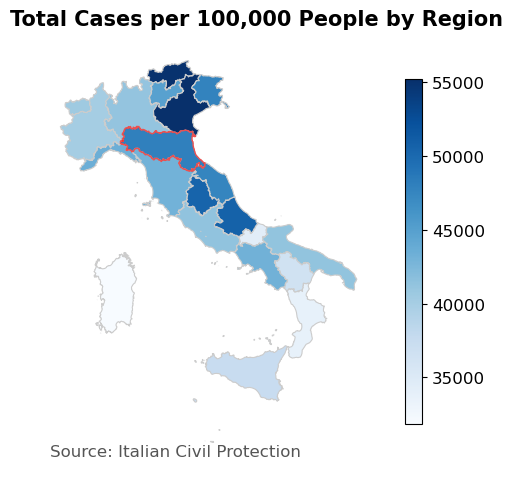

In [16]:
# Set a variable that will call whatever column we want to visualize on the map
variable = 'TCASI_100K'

# Set the range for the choropleth
vmin, vmax = (merged[variable].min(), merged[variable].max())

# Create figure and axes for Matplotlib
fig, ax = plt.subplots(figsize=(5, 5))

# Plot the map
merged.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')
ER_geo = gpd.GeoDataFrame(merged.loc[8]).T
ER_geo.plot(ax=ax, edgecolor='red', facecolor='none', alpha=0.6)

# Remove the axis
ax.axis('off')

# Set the aspect ratio to be equal to the aspect ratio of the figure
ax.set_aspect('equal', adjustable='datalim')

# Add a title and subtitle
plt.suptitle('Total Cases per 100,000 People by Region', fontsize=15, fontweight='bold')

# Add an annotation for the data source
ax.annotate('Source: Italian Civil Protection', xy=(0.1, .08), xycoords='figure fraction', 
            horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')


# Create a colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))

# Empty array for the data range
sm._A = []

# Add the colorbar to the figure
cbar = fig.colorbar(sm, ax=ax, shrink=0.85)

save_fig('regioni_map')


***